In [1]:
#Libraries I imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

In [2]:
#I named the training data ames and named the testing data ames_kaggle
ames = pd.read_csv('./datasets/train.csv')
ames_kaggle = pd.read_csv('./datasets/test.csv')

In [3]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Data Cleaning

In [4]:
#These columns had null values and in order to use them for modeling I need to fill them with some values.
#For all numerical values I filled the columns with zero's since this feature does not exist
#For all categorical values I filled the null columns with no since this feature does not exist
ames['Lot Frontage'] = ames['Lot Frontage'].fillna(0)
ames_kaggle['Lot Frontage'] = ames_kaggle['Lot Frontage'].fillna(0)

ames['Mas Vnr Area'] = ames['Mas Vnr Area'].fillna(0)
ames_kaggle['Mas Vnr Area'] = ames_kaggle['Mas Vnr Area'].fillna(0)

ames['BsmtFin SF 1'].fillna(0, inplace=True)
ames_kaggle['BsmtFin SF 1'].fillna(0, inplace=True)

ames['BsmtFin SF 2'].fillna(0, inplace=True)
ames_kaggle['BsmtFin SF 2'].fillna(0, inplace=True)

ames['Bsmt Unf SF'].fillna(0, inplace=True)
ames_kaggle['Bsmt Unf SF'].fillna(0, inplace=True)

ames['Total Bsmt SF'].fillna(0, inplace=True)
ames_kaggle['Total Bsmt SF'].fillna(0, inplace=True)

ames['Bsmt Full Bath'].fillna(0, inplace=True)
ames_kaggle['Bsmt Full Bath'].fillna(0, inplace=True)

ames['Bsmt Half Bath'].fillna(0, inplace=True)
ames_kaggle['Bsmt Half Bath'].fillna(0, inplace=True)

ames['Garage Type'].fillna('no garage', inplace=True)
ames_kaggle['Garage Type'].fillna('no garage', inplace=True)

ames['Garage Cars'].fillna(0, inplace=True)
ames_kaggle['Garage Cars'].fillna(0, inplace=True)

ames['Garage Area'].fillna(0, inplace=True)
ames_kaggle['Garage Area'].fillna(0, inplace=True)



In [5]:
#For all categorical columns that did not have a specific order I made the columns into dummy variables
#I did this since one category isn't necessarily better than the other the only way to model these values is to make 
#each value a dummy variable.
ames = pd.get_dummies(ames, columns=['MS Zoning'], drop_first = True)
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['MS Zoning'], drop_first = True)

ames = pd.get_dummies(ames, columns=['Alley'], drop_first = True)
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['Alley'], drop_first = True)

ames = pd.get_dummies(ames, columns=['Street'], drop_first = True) 
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['Street'], drop_first = True) 

ames = pd.get_dummies(ames, columns=['Land Contour'], drop_first = True)
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['Land Contour'], drop_first = True)

ames = pd.get_dummies(ames, columns=['Lot Config'], drop_first = True)
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['Lot Config'], drop_first = True)

ames = pd.get_dummies(ames, columns=['Lot Shape'], drop_first = True)
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['Lot Shape'], drop_first = True)

ames = pd.get_dummies(ames, columns=['Neighborhood'], drop_first = True)
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['Neighborhood'], drop_first = True)

ames = pd.get_dummies(ames, columns=['Condition 1'], drop_first = True)
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['Condition 1'], drop_first = True)

ames = pd.get_dummies(ames, columns=['Condition 2'], drop_first = True)
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['Condition 2'], drop_first = True)

ames = pd.get_dummies(ames, columns=['Bldg Type'], drop_first = True)
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['Bldg Type'], drop_first = True)

ames = pd.get_dummies(ames, columns=['House Style'], drop_first = True)
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['House Style'], drop_first = True)

ames = pd.get_dummies(ames, columns=['Roof Style'], drop_first = True)
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['Roof Style'], drop_first = True)

ames = pd.get_dummies(ames, columns=['Roof Matl'], drop_first = True)
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['Roof Matl'], drop_first = True)

ames = pd.get_dummies(ames, columns=['Exterior 1st'], drop_first = True)
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['Exterior 1st'], drop_first = True)

ames = pd.get_dummies(ames, columns=['Exterior 2nd'], drop_first = True)
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['Exterior 2nd'], drop_first = True)

ames = pd.get_dummies(ames, columns=['Mas Vnr Type'], drop_first = True)
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['Mas Vnr Type'], drop_first = True)

ames = pd.get_dummies(ames, columns=['Foundation'], drop_first = True)
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['Foundation'], drop_first = True)

ames = pd.get_dummies(ames, columns=['Heating'], drop_first = True)
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['Heating'], drop_first = True)

ames = pd.get_dummies(ames, columns=['Central Air'], drop_first = True)
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['Central Air'], drop_first = True)

ames = pd.get_dummies(ames, columns=['Garage Type'], drop_first = True)
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['Garage Type'], drop_first = True)

ames = pd.get_dummies(ames, columns=['Sale Type'], drop_first = True)
ames_kaggle = pd.get_dummies(ames_kaggle, columns=['Sale Type'], drop_first = True)

In [6]:
#I dropped Misc features because it mostly has null values.
#I dopped Garage Yr Built since it had many null values and was not sure what to fill the null values with. 

ames= ames.drop('Misc Feature', axis=1)
ames_kaggle= ames_kaggle.drop('Misc Feature', axis=1)

ames.drop('Garage Yr Blt', axis=1, inplace=True)
ames_kaggle.drop('Garage Yr Blt', axis=1, inplace=True)

In [7]:
#These columns had categorical values but were ordinal so there was a clear best value ordered to worst value.
#I used dictionaries to map the make the categorical columns into numerical columns

ames['Fireplace Qu'].fillna('no fireplace', inplace=True)
ames_kaggle['Fireplace Qu'].fillna('no fireplace', inplace=True)
fireplace_qual_values = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'no fireplace': 0}
ames['Fireplace Qu'] = ames['Fireplace Qu'].map(fireplace_qual_values)
ames_kaggle['Fireplace Qu'] = ames_kaggle['Fireplace Qu'].map(fireplace_qual_values)

ames['Utilities'].fillna('ELO', inplace=True)
ames_kaggle['Utilities'].fillna('ELO', inplace=True)
utility_values = {'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0}
ames['Utilities'] = ames['Utilities'].map(utility_values)
ames_kaggle['Utilities'] = ames_kaggle['Utilities'].map(utility_values)

slope_values = {'Gtl': 2, 'Mod': 1, 'Sev': 0}
ames['Land Slope'] = ames['Land Slope'].map(slope_values)
ames_kaggle['Land Slope'] = ames_kaggle['Land Slope'].map(slope_values)

exter_qual_values = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
ames['Exter Qual'] = ames['Exter Qual'].map(exter_qual_values)
ames_kaggle['Exter Qual'] = ames_kaggle['Exter Qual'].map(exter_qual_values)

exter_cond_values = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
ames['Exter Cond'] = ames['Exter Cond'].map(exter_cond_values)
ames_kaggle['Exter Cond'] = ames_kaggle['Exter Cond'].map(exter_cond_values)

ames['Bsmt Qual'].fillna('no basement', inplace=True)
ames_kaggle['Bsmt Qual'].fillna('no basement', inplace=True)
bsmt_qual_values = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'no basement': 0}
ames['Bsmt Qual'] = ames['Bsmt Qual'].map(bsmt_qual_values)
ames_kaggle['Bsmt Qual'] = ames_kaggle['Bsmt Qual'].map(bsmt_qual_values)

ames['Bsmt Cond'].fillna('no basement', inplace=True)
ames_kaggle['Bsmt Cond'].fillna('no basement', inplace=True)
bsmt_cond_values = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'no basement': 0}
ames['Bsmt Cond'] = ames['Bsmt Cond'].map(bsmt_cond_values)
ames_kaggle['Bsmt Cond'] = ames_kaggle['Bsmt Cond'].map(bsmt_cond_values)

ames['Bsmt Exposure'].fillna('no basement', inplace=True)
ames_kaggle['Bsmt Exposure'].fillna('no basement', inplace=True)
bsmt_exp_values = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'no basement': 0}
ames['Bsmt Exposure'] = ames['Bsmt Exposure'].map(bsmt_exp_values)
ames_kaggle['Bsmt Exposure'] = ames_kaggle['Bsmt Exposure'].map(bsmt_exp_values)

ames['BsmtFin Type 1'].fillna('no basement', inplace=True)
ames_kaggle['BsmtFin Type 1'].fillna('no basement', inplace=True)
bsmt_fin1_values = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'no basement': 0}
ames['BsmtFin Type 1'] = ames['BsmtFin Type 1'].map(bsmt_fin1_values)
ames_kaggle['BsmtFin Type 1'] = ames_kaggle['BsmtFin Type 1'].map(bsmt_fin1_values)

ames['BsmtFin Type 2'].fillna('no basement', inplace=True)
ames_kaggle['BsmtFin Type 2'].fillna('no basement', inplace=True)
bsmt_fin2_values = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'no basement': 0}
ames['BsmtFin Type 2'] = ames['BsmtFin Type 2'].map(bsmt_fin2_values)
ames_kaggle['BsmtFin Type 2'] = ames_kaggle['BsmtFin Type 2'].map(bsmt_fin2_values)

heating_values = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
ames['Heating QC'] = ames['Heating QC'].map(heating_values)
ames_kaggle['Heating QC'] = ames_kaggle['Heating QC'].map(heating_values)

ames['Electrical'].fillna('Mix', inplace=True)
ames_kaggle['Electrical'].fillna('Mix', inplace=True)
electrical_values = {'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0}
ames['Electrical'] = ames['Electrical'].map(electrical_values)
ames_kaggle['Electrical'] = ames_kaggle['Electrical'].map(electrical_values)

kitchen_qual_values = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
ames['Kitchen Qual'] = ames['Kitchen Qual'].map(kitchen_qual_values)
ames_kaggle['Kitchen Qual'] = ames_kaggle['Kitchen Qual'].map(kitchen_qual_values)

functional_values = {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0}
ames['Functional'] = ames['Functional'].map(functional_values)
ames_kaggle['Functional'] = ames_kaggle['Functional'].map(functional_values)

ames['Garage Qual'].fillna('no garage', inplace=True)
ames_kaggle['Garage Qual'].fillna('no garage', inplace=True)
garage_qual_values = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'no garage': 0}
ames['Garage Qual'] = ames['Garage Qual'].map(garage_qual_values)
ames_kaggle['Garage Qual'] = ames_kaggle['Garage Qual'].map(garage_qual_values)

ames['Garage Cond'].fillna('no garage', inplace=True)
ames_kaggle['Garage Cond'].fillna('no garage', inplace=True)
garage_cond_values = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'no garage': 0}
ames['Garage Cond'] = ames['Garage Cond'].map(garage_cond_values)
ames_kaggle['Garage Cond'] = ames_kaggle['Garage Cond'].map(garage_cond_values)

ames['Garage Finish'].fillna('no garage', inplace=True)
ames_kaggle['Garage Finish'].fillna('no garage', inplace=True)
garage_finish_values = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'no garage': 0}
ames['Garage Finish'] = ames['Garage Finish'].map(garage_finish_values)
ames_kaggle['Garage Finish'] = ames_kaggle['Garage Finish'].map(garage_finish_values)

paved_drive_values = {'Y': 2, 'P': 1, 'N': 0}
ames['Paved Drive'] = ames['Paved Drive'].map(paved_drive_values)
ames_kaggle['Paved Drive'] = ames_kaggle['Paved Drive'].map(paved_drive_values)

ames['Pool QC'].fillna('no pool', inplace=True)
ames_kaggle['Pool QC'].fillna('no pool', inplace=True)
pool_quality_values = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'no pool': 0}
ames['Pool QC'] = ames['Pool QC'].map(pool_quality_values)
ames_kaggle['Pool QC'] = ames_kaggle['Pool QC'].map(pool_quality_values)

ames['Fence'].fillna('no fence', inplace=True)
ames_kaggle['Fence'].fillna('no fence', inplace=True)
fence_values = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'no fence': 0}
ames['Fence'] = ames['Fence'].map(fence_values)
ames_kaggle['Fence'] = ames_kaggle['Fence'].map(fence_values)



In [8]:
#https://stackoverflow.com/questions/41335718/keep-same-dummy-variable-in-training-and-testing-data
#This adds all columns that are in the train data but not in the test data into the test data
#All these columns are dummy columns so all the rows will have zero in those columns.
#I used set to have only unique values
#Drop sales price form the test data since that is the column we are predicting.
missing_cols = set(ames.columns) - set(ames_kaggle.columns)
for c in missing_cols:
    ames_kaggle[c] = 0
ames_kaggle = ames_kaggle[ames.columns]

ames_kaggle.drop(['SalePrice'], axis = 1, inplace = True)

Text(0.5, 0, 'Sale Price in Dollars')

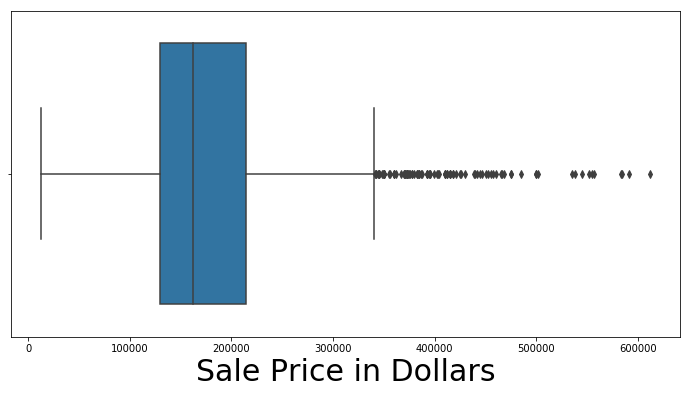

In [9]:
#Boxplot shows that there might be some outliers for saleprice
#Should look at the relationship between values to see if these are outliers or just expensive houses that might be larger.
plt.figure(figsize = (12, 6))
sns.boxplot(ames['SalePrice'])
plt.xlabel('Sale Price in Dollars', fontsize = 30)

In [10]:
#Shows top 10 variables with the highest correlation to SalePrice.
#This gives us a good idea of what variables that we might want to use in our model.
plt.figure(figsize=(50, 40))
sorted_corr = abs(ames.corr()[['SalePrice']]).sort_values('SalePrice', ascending=False)
sorted_corr.head(15)

,SalePrice
SalePrice,1.000000
Overall Qual,0.800207
Exter Qual,0.712146
Gr Liv Area,0.697038
Kitchen Qual,0.692336
Garage Area,0.649897
Garage Cars,0.647781
Total Bsmt SF,0.629303
1st Flr SF,0.618486
Bsmt Qual,0.612188


<Figure size 3600x2880 with 0 Axes>

/anaconda3/envs/dsi/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Price of a House')

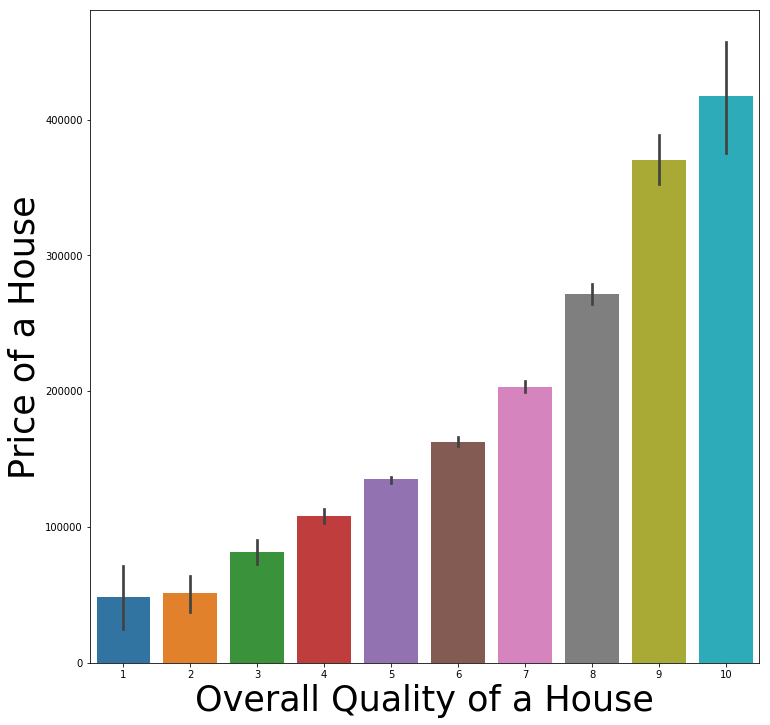

In [11]:
#Used this plot to show that as overall quality increases so does Sales price
#This can be assumed but is good to confirm that this trend is in fact true
plt.figure(figsize = (12, 12))
sns.barplot(ames['Overall Qual'], ames['SalePrice'])
plt.xlabel('Overall Quality of a House', fontsize = 35)
plt.ylabel('Price of a House', fontsize = 35)

Text(0, 0.5, 'Price of a House')

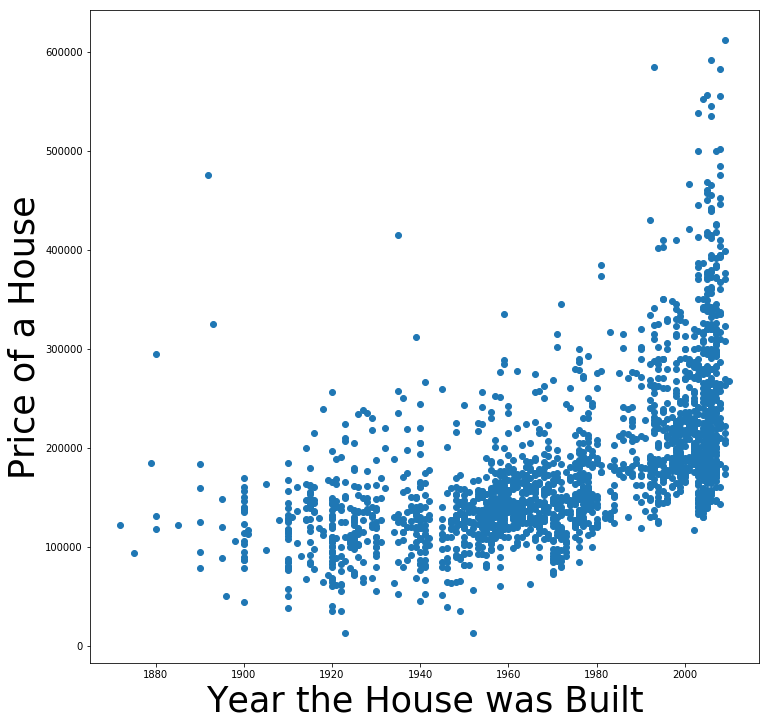

In [12]:
#This plot shows that newer houses tend to sell for higher prices.
#This also interests me because I can see a cluster of houses built around 1960 and 2005
plt.figure(figsize = (12, 12))
plt.scatter(ames['Year Built'], ames['SalePrice'])
plt.xlabel('Year the House was Built', fontsize = 35)
plt.ylabel('Price of a House', fontsize = 35)

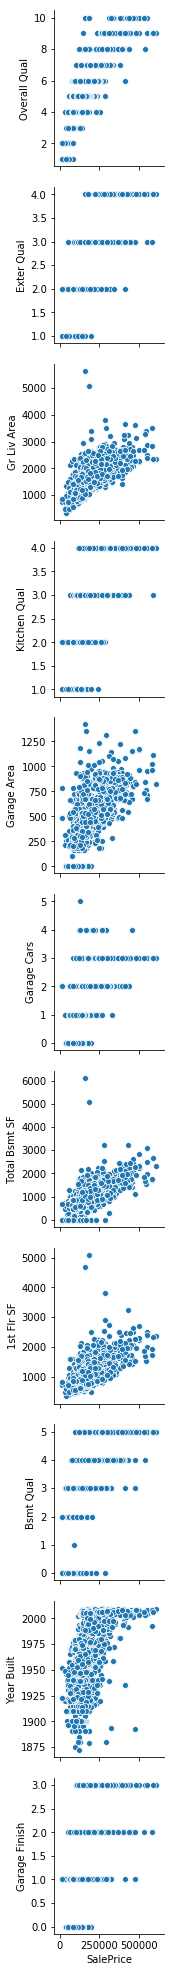

In [13]:
#Gr Liv Area, Total Basement SF, 1st Flr SF illuminates that a outlier might exist
#Looking at the distribution of the top 11 most correlated variables with sales price which is what we are trying to predict.
sns.pairplot(ames, y_vars = ['Overall Qual', 'Exter Qual', 'Gr Liv Area', 'Kitchen Qual', 'Garage Area', 'Garage Cars',
                             'Total Bsmt SF', '1st Flr SF', 'Bsmt Qual', 'Year Built', 'Garage Finish' 
                             ], x_vars = ['SalePrice'])

In [14]:
#I can the first 2 rows have super high SF but very low price.
ames[['Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'SalePrice']].sort_values(['Gr Liv Area'], ascending=False).head(10)

,Gr Liv Area,Total Bsmt SF,1st Flr SF,SalePrice
960,5642,6110.0,4692,160000
1885,5095,5095.0,5095,183850
616,3820,0.0,3820,284700
1897,3672,1836.0,1836,415000
1035,3608,1107.0,1518,475000
1692,3500,1733.0,1933,584500
1939,3493,1470.0,1675,295000
858,3395,1440.0,1440,200000
138,3390,1528.0,1528,545224
823,3279,1650.0,1690,538000


In [15]:
#Create a column for huge houses that is a binary column that measures if a house is over 3800 sq feet or not.
#Wondering if using this variable will account for huge houses that have low price
#Does not appear to have an impact.
ames['huge houses'] = ames['1st Flr SF'].map(lambda x: 1 if x > 3800 else 0)
ames_kaggle['huge houses'] = ames_kaggle['1st Flr SF'].map(lambda x: 1 if x > 3800 else 0)

In [16]:
#replaces outlier in the Gr Liv Area column and replaces it with the mean of the column
#This will make sure that these outliers aren't negatively impacting our model.
ames['Gr Liv Area'] = ames['Gr Liv Area'].map(lambda x: np.mean(ames['Gr Liv Area']) if x > 4000 else x)
ames_kaggle['Gr Liv Area'] = ames_kaggle['Gr Liv Area'].map(lambda x: np.mean(ames_kaggle['Gr Liv Area']) if x > 4000 else x)

In [17]:
#replaces outlier in the 1st Flr SF column and replaces it with the mean of the column
#This will make sure that these outliers aren't negatively impacting our model.
ames['1st Flr SF'] = ames['1st Flr SF'].map(lambda x: np.mean(ames['1st Flr SF']) if x > 3800 else x)
ames_kaggle['1st Flr SF'] = ames_kaggle['1st Flr SF'].map(lambda x: np.mean(ames_kaggle['1st Flr SF']) if x > 3800 else x)

In [18]:
#replaces outlier in the Total Bsmt SF column and replaces it with the mean of the column
#This will make sure that these outliers aren't negatively impacting our model.
ames['Total Bsmt SF'] = ames['Total Bsmt SF'].map(lambda x: np.mean(ames['Total Bsmt SF']) if x == 0 else x)
ames_kaggle['Total Bsmt SF'] = ames_kaggle['Total Bsmt SF'].map(lambda x: np.mean(ames_kaggle['Total Bsmt SF']) if x == 0 else x)

In [19]:
#I can now look and see that I know longer have these outliers in the SF categories.
ames[['Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'SalePrice', 'huge houses']].sort_values(['Gr Liv Area'], ascending=False).head(10)

,Gr Liv Area,Total Bsmt SF,1st Flr SF,SalePrice,huge houses
616,3820.0,1057.471965,1164.488055,284700,1
1897,3672.0,1836.000000,1836.000000,415000,0
1035,3608.0,1107.000000,1518.000000,475000,0
1692,3500.0,1733.000000,1933.000000,584500,0
1939,3493.0,1470.000000,1675.000000,295000,0
858,3395.0,1440.000000,1440.000000,200000,0
138,3390.0,1528.000000,1528.000000,545224,0
823,3279.0,1650.000000,1690.000000,538000,0
1389,3238.0,2033.000000,2053.000000,410000,0
328,3228.0,3200.000000,3228.000000,430000,0


In [20]:
#Create interaction column that looks at overall size of the house
ames['area_total'] = ames['BsmtFin SF 1'] * ames['BsmtFin SF 2'] * ames['Bsmt Unf SF'] * ames['1st Flr SF'] * ames['2nd Flr SF'] * ames['Garage Area']
ames_kaggle['area_total'] = ames_kaggle['BsmtFin SF 1'] * ames_kaggle['BsmtFin SF 2'] * ames_kaggle['Bsmt Unf SF'] * ames_kaggle['1st Flr SF'] * ames_kaggle['2nd Flr SF'] * ames_kaggle['Garage Area']

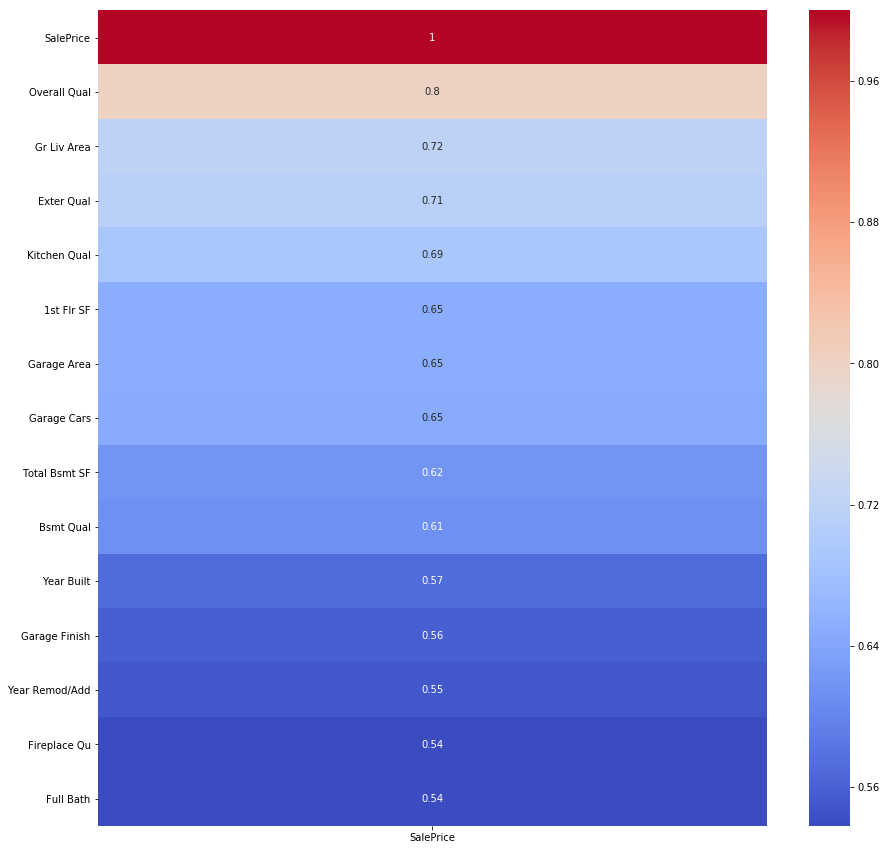

In [21]:
#Plotted a heatmap of the most correlated variables for SalePrice are.
plt.figure(figsize =(15, 15))
sns.heatmap(ames.corr()[['SalePrice']].sort_values('SalePrice', ascending=False)[:15], annot=True, cmap = 'coolwarm');

# Chosing which variables

In [22]:
#Making my list of features all columns that are not Sale Price to see which variables have an impact on Sale Price
#Have X pull the features from my ames dataset
#Have y be the sale price column.
features = [column for column  in ames.columns if column != 'SalePrice']
X = ames[features]
y = ames['SalePrice']

In [23]:
#Do a train test split on my ames dataset and choose my random state to be 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
#assigning the kaggle X features to be all the columns.
features = [column for column  in ames_kaggle.columns if column != 'SalePrice']
X_ames_kaggle_test = ames_kaggle[features]

## Powertransformer

In [25]:
#assigning the power transformer and then fitting it to my training data
#I then transform my X_train, X_test and X_kaggle_test so that my x values follow a normal distribution comparing to X_train.
pt_X = PowerTransformer()
pt_X.fit(X_train)
X_train_pt = pt_X.transform(X_train)
X_test_pt = pt_X.transform(X_test)
X_ames_kaggle_test_pt = pt_X.transform(X_ames_kaggle_test)

#Fit the y_train and then transform the y_train and y_test to have a normal distribution comparing to y_train
pt_y = PowerTransformer()
pt_y.fit(y_train.to_frame())
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/preprocessing/data.py:2778: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/anaconda3/envs/dsi/lib/python3.6/site-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [26]:
#I want to compare the linear regression, the lasso and the ridge to see which performs the best.
#After I find that out I can use that to help me determine which model to use
lr = LinearRegression()
lasso = LassoCV(n_alphas=500, cv=5)
ridge = RidgeCV(alphas=np.logspace(.1, 10, 100))

#Print the cross value score of the linear regression
lr_scores = cross_val_score(lr, X_train, y_train_pt, cv=3)
print('Linear Regression: ', lr_scores.mean())

#Print the cross value score of the ridge regression
ridge_scores = cross_val_score(ridge, X_train_pt, y_train_pt[:, 0], cv=3)
print('Ridge Score: ', ridge_scores.mean())

#Print the cross value score of the lasso regression
lasso_scores = cross_val_score(lasso, X_train_pt, y_train_pt, cv=3)
print('Lasso Score: ', lasso_scores.mean())

Linear Regression:  0.6569631131174666
Ridge Score:  0.8973379114432104


/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lasso Score:  0.9060063054653829


In [27]:
#Use the lasso to fit the model on the transformed X_train and y_train
#I can see that my model is a tiny bit overfit since my training score is slightly above my testing score
lasso.fit(X_train_pt, y_train_pt)
print('Lasso Training Score: ', lasso.score(X_train_pt, y_train_pt))

print('Lasso Testing Score: ', lasso.score(X_test_pt, y_test_pt))

print('Lasso scores mean: ', lasso_scores.mean())

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lasso Training Score:  0.9355523215971236
Lasso Testing Score:  0.8881437175494451
Lasso scores mean:  0.9060063054653829


In [28]:
#Creating a new variable which is a prediction based off my transformed X_test variables.
#Also creating a new variable which is a prediction based off my X_kaggle variables.
#Doing the inverse of my predictions so that they are on the origional scale.
#Creating a new column called sales price which is the kaggle predictions we just created.
#Seeing what the r2 score and rsme are for the predictions when comparing them to y_test
pred = lasso.predict(X_test_pt)
pred_kaggle = lasso.predict(X_ames_kaggle_test_pt)
pred_reversed = pt_y.inverse_transform(pred.reshape(-1,1))
pred_reversed_kaggle = pt_y.inverse_transform(pred_kaggle.reshape(-1,1))
ames_kaggle['SalePrice'] = pred_reversed_kaggle
print(r2_score(y_test, pred_reversed))
print((mean_squared_error(y_test, pred_reversed)) ** .5)

0.9310398422039143
20577.100725663695


In [29]:
#Looking at the coefficients for all my variables are. These are all absolute value though.
coef_lasso = dict(zip(list(ames.columns), abs(lasso.coef_)))
coef_lasso_pd = pd.DataFrame([coef_lasso])
coef_lasso_pd = coef_lasso_pd.T
coef_lasso_pd.sort_values(0, ascending=False).head(10)

,0
Gr Liv Area,0.317554
Overall Qual,0.171667
Year Built,0.138185
Lot Area,0.107901
Overall Cond,0.106358
BsmtFin SF 1,0.078894
Total Bsmt SF,0.063919
Heating_OthW,0.055485
Sale Type_WD,0.050673
Fireplaces,0.048555


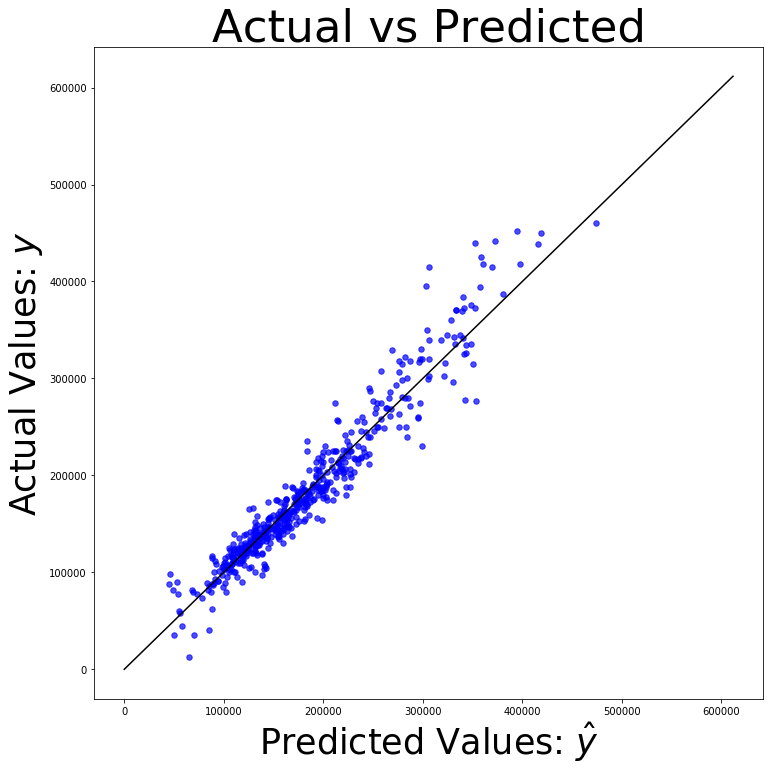

In [30]:
# A:
#The relationship appears to be approximately linear
plt.figure(figsize=(12,12))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(pred_reversed, y_test, s=30, c='b', alpha = .7)
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 35)
plt.ylabel("Actual Values: $y$", fontsize = 35)


plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')
plt.title('Actual vs Predicted', fontsize = 45)
plt.show();

In [31]:
#Finding my residuals by subtractings y's from my predicted in their proper scale
#I use .flatten so that the predicted values are a series
residuals = y_test - pred_reversed.flatten()

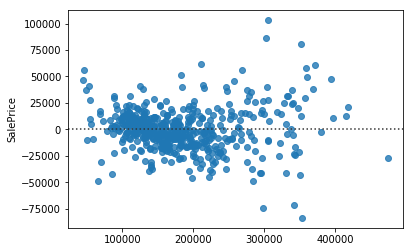

In [32]:
#Points to the right are fine since there are variance in our data naturally. 
#Variance as price increases is fine since Professors are likely to buy more expensive houses.
sns.residplot(pred_reversed.flatten(), residuals)

### Getting Ready for submission

In [33]:
#Setting submission equal the kaggle data ID and sale price column
#make the index the ID column
submission = ames_kaggle[["Id", 'SalePrice']]
submission = submission.set_index(['Id'])
#Sort the values based on the ID column
submission.sort_values(['Id'], inplace=True)
#Save the submission to a csv and save it in the folder as submission3.csv
submission.to_csv('./submission3.csv')